In [1]:
print("This is a joint project of the following students")
print("CS21MDS14003 - Himanshu Malhotra")
print("CS21MDS14025 - Sauradeep Debnath")

This is a joint project of the following students
CS21MDS14003 - Himanshu Malhotra
CS21MDS14025 - Sauradeep Debnath


## Path of the csv files

In [2]:
print("Please check the given input path of the test and train csv files:-")

train_path = "/Users/malhim01/Documents/HM_Laptop/HM/IITH/Machine Learning/Assignments/Hackathon/Foml-2021/train.csv"
test_path = "/Users/malhim01/Documents/HM_Laptop/HM/IITH/Machine Learning/Assignments/Hackathon/Foml-2021/test.csv"

print("train csv file path used ->",train_path)
print("test csv file path used ->",test_path)

Please check the given input path of the test and train csv files:-
train csv file path used -> /Users/malhim01/Documents/HM_Laptop/HM/IITH/Machine Learning/Assignments/Hackathon/Foml-2021/train.csv
test csv file path used -> /Users/malhim01/Documents/HM_Laptop/HM/IITH/Machine Learning/Assignments/Hackathon/Foml-2021/test.csv


### Imports

In [3]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno
import warnings
import seaborn as sns
plt.style.use('seaborn-whitegrid')
from catboost import CatBoostClassifier, Pool, cv
warnings.filterwarnings('ignore')
print("Done")

Done


In [55]:
%matplotlib inline

### Reading Dataset

In [4]:
# Import train & test data
master_train = pd.read_csv(train_path)
master_test = pd.read_csv(test_path)

# Converting string to lowercase
master_train = master_train.fillna('hello').apply(lambda x :x.astype(str).str.lower()).replace('hello',np.nan)
master_test = master_test.fillna('hello').apply(lambda x :x.astype(str).str.lower()).replace('hello',np.nan)
master_train["Fault"] = master_train.Fault.astype(int)

# Cleaning of the Columns Name
master_train.columns = master_train.columns.str.replace(' ','_')
master_train.columns = master_train.columns.str.replace('-','_')
master_train.columns = master_train.columns.str.replace('/','_')
master_train.columns = master_train.columns.str.replace(' ','_')
master_train.columns = master_train.columns.str.replace('-','_')
master_train.columns = master_train.columns.str.replace('/','_')

master_test.columns = master_test.columns.str.replace(' ','_')
master_test.columns = master_test.columns.str.replace('-','_')
master_test.columns = master_test.columns.str.replace('/','_')
master_test.columns = master_test.columns.str.replace(' ','_')
master_test.columns = master_test.columns.str.replace('-','_')
master_test.columns = master_test.columns.str.replace('/','_')

train = master_train
test = master_test

print("Done!")

Done!


### Missing Data Evaluation

<AxesSubplot:>

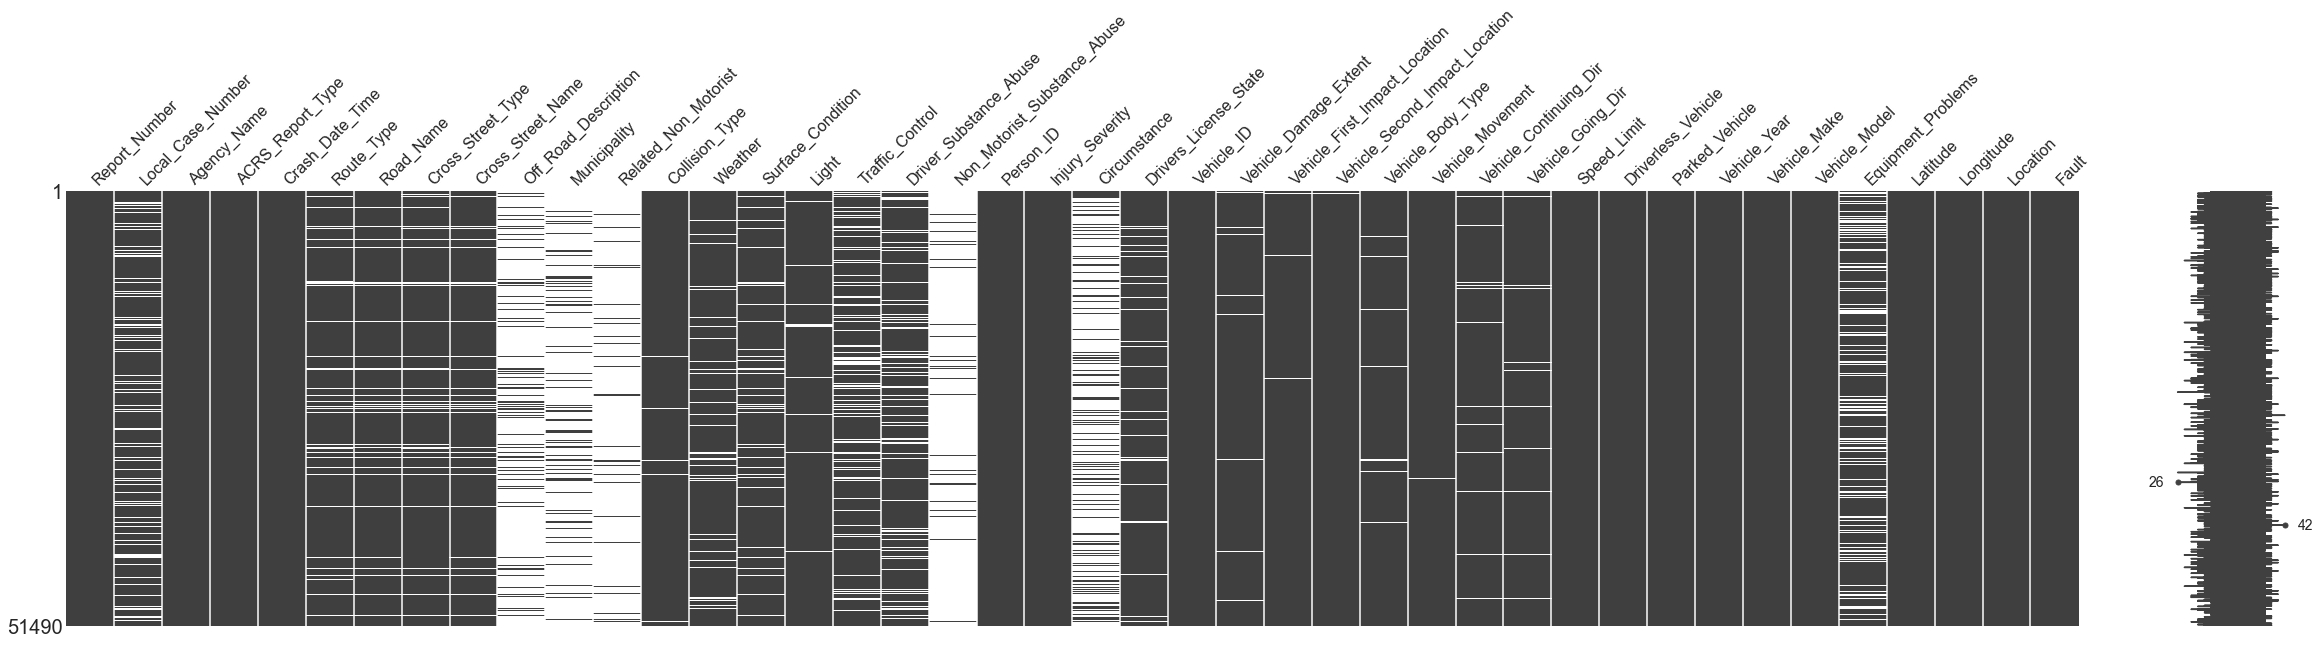

In [57]:
# Plot graphic of missing values
missingno.matrix(train, figsize = (40,8))

In [58]:
# Missing Cell Percentage

percent_missing = train.isnull().sum() * 100 / len(train)
missing_value_df = pd.DataFrame({'column_name': train.columns,
                                 'percent_missing': percent_missing})

display(missing_value_df)

,column_name,percent_missing
Report_Number,Report_Number,0.000000
Local_Case_Number,Local_Case_Number,12.532531
Agency_Name,Agency_Name,0.000000
ACRS_Report_Type,ACRS_Report_Type,0.000000
Crash_Date_Time,Crash_Date_Time,0.000000
Route_Type,Route_Type,9.648475
Road_Name,Road_Name,8.743445
Cross_Street_Type,Cross_Street_Type,9.747524
Cross_Street_Name,Cross_Street_Name,8.782288
Off_Road_Description,Off_Road_Description,86.502233


# EDA

In [79]:
train.head()

,Report_Number,Local_Case_Number,Agency_Name,ACRS_Report_Type,Crash_Date_Time,Route_Type,Road_Name,Cross_Street_Type,Cross_Street_Name,Off_Road_Description,...,Driverless_Vehicle,Parked_Vehicle,Vehicle_Year,Vehicle_Make,Vehicle_Model,Equipment_Problems,Latitude,Longitude,Location,Fault
0,mp060d,10196,montgomery county police,injury crash,06/05/2017 04:27:00 pm,maryland (state),old hundred rd,county,thurston rd,12305 shorefield rd,...,no,no,2005,gmc,truck,no misuse,39.26337833,-77.34420333,3.6383 7.4233,1
1,mp000x,20080,montgomery county police,injury crash,02/22/2020 10:00:00 am,county,janet rd,county,flack st,nan,...,no,yes,2018,ford,fiesta,no misuse,39.06891333,-77.06322667,3.0862 7.324,1
2,mp070n,10103,montgomery county police,property damage crash,06/11/2017 08:21:00 am,maryland (state),colesville rd,maryland (state),struc #15082,nan,...,no,no,2016,new flyer,tbu,no misuse,38.99357833,-77.03271833,3.9583 7.3783,0
3,mp130y,10208,montgomery county police,injury crash,05/10/2019 07:30:00 am,county,parkland dr,county,frankfort dr,nan,...,no,no,2001,chev,suburban,other,39.08348,-77.08693333,"3.84,-70633",1
4,mp770y,1091,montgomery county police,injury crash,08/02/2016 05:00:00 pm,maryland (state),old georgetown rd,county,mckinley st,nan,...,no,no,2013,kia,rio,no misuse,38.99694167,-77.10916833,3.9917 7.0183,0


#### Report Number

In [59]:
print("Cheking the impact of Report Number on the dependent variable")
print("Fetching Mean:-")
print(train.fillna("NA").groupby("Report_Number")["Fault"].mean().sort_values(ascending=False))
print("\n\nFetching Count:-")
print(train.fillna("NA").groupby("Report_Number")["Fault"].count())

Cheking the impact of Report Number on the dependent variable
Fetching Mean:-
Report_Number
mp400t    1.0
mp490k    1.0
mp620v    1.0
mp490d    1.0
mp490h    1.0
         ... 
mp510y    0.0
d5207     0.0
mp440s    0.0
e7307     0.0
mp490v    0.0
Name: Fault, Length: 3256, dtype: float64


Fetching Count:-
Report_Number
d5000      60
d5001     159
d5002     144
d5003     126
d5004      97
         ... 
mp990v     12
mp990w     12
mp990x     22
mp990y     25
mp990z     22
Name: Fault, Length: 3256, dtype: int64


#### Local_Case_Number

In [60]:
print("Cheking the impact of Local_Case_Number on the dependent variable")
print("Fetching Mean:-")
print(train.fillna("NA").groupby("Local_Case_Number")["Fault"].mean().sort_values(ascending=False))
print("\n\nFetching Count:-")
print(train.fillna("NA").groupby("Local_Case_Number")["Fault"].count())

Cheking the impact of Local_Case_Number on the dependent variable
Fetching Mean:-
Local_Case_Number
10957    1.0
2015     1.0
20556    1.0
1573     1.0
20509    1.0
        ... 
10903    0.0
20533    0.0
20531    0.0
1999     0.0
20546    0.0
Name: Fault, Length: 1430, dtype: float64


Fetching Count:-
Local_Case_Number
1000       213
10000       26
10001       39
10002       33
10003       25
          ... 
NA        6453
p00672       1
p6008        5
p6033        2
p6291        4
Name: Fault, Length: 1430, dtype: int64


#### Agency_Name

Cheking the impact of Agency_Name on the dependent variable
Fetching Mean:-
Agency_Name
maryland-national capital    0.586667
rockville                    0.573705
gaithersburg                 0.566832
gaithersburg police depar    0.558233
rockville police departme    0.556787
takoma park police depart    0.550380
montgomery county police     0.550225
montgomery                   0.536034
mcpark                       0.523466
takoma                       0.520295
Name: Fault, dtype: float64


Fetching Count:-
Agency_Name
gaithersburg                   404
gaithersburg police depar     2241
maryland-national capital      525
mcpark                         277
montgomery                    4246
montgomery county police     39084
rockville                      502
rockville police departme     2888
takoma                         271
takoma park police depart     1052
Name: Fault, dtype: int64


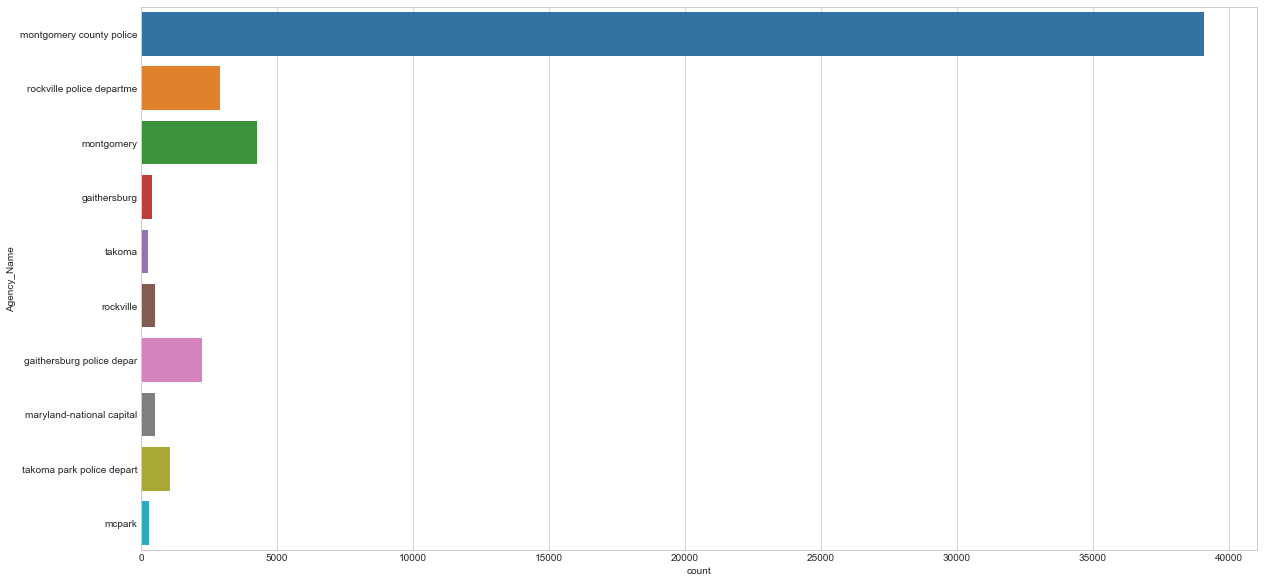

In [5]:
# Agency_Name
fig = plt.figure(figsize=(20,10))
sns.countplot(y='Agency_Name', data=train)

print("Cheking the impact of Agency_Name on the dependent variable")
print("Fetching Mean:-")
print(train.fillna("NA").groupby("Agency_Name")["Fault"].mean().sort_values(ascending=False))
print("\n\nFetching Count:-")
print(train.fillna("NA").groupby("Agency_Name")["Fault"].count())


# cleaning the feature agency name
train["cleaned_Agency_Name"] = [x.lower().split(" ")[0] for x in train.Agency_Name]


#### ACRS_Report_Type

Fetching Mean:-
ACRS_Report_Type
property damage crash    0.569362
fatal crash              0.557512
injury crash             0.517915
Name: Fault, dtype: float64


Fetching Count:-
ACRS_Report_Type
fatal crash                852
injury crash             18978
property damage crash    31660
Name: Fault, dtype: int64


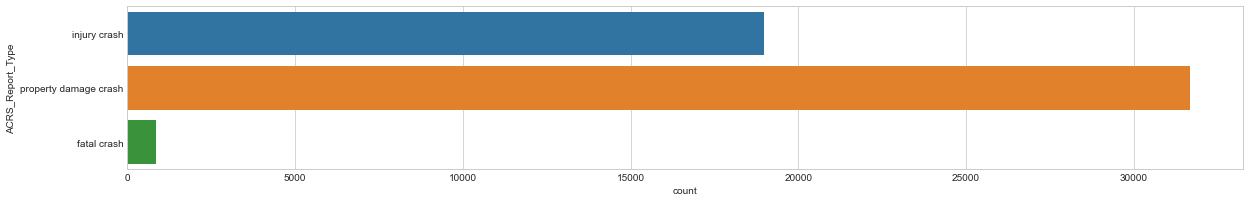

In [6]:
# ACRS_Report_Type
fig = plt.figure(figsize=(20,3))
sns.countplot(y='ACRS_Report_Type', data=train)

# print("Cheking the impact of ACRS_Report_Type on the dependent variable")
print("Fetching Mean:-")
print(train.fillna("NA").groupby("ACRS_Report_Type")["Fault"].mean().sort_values(ascending=False))
print("\n\nFetching Count:-")
print(train.fillna("NA").groupby("ACRS_Report_Type")["Fault"].count())

#### Crash_Date_Time

In [7]:
# Creating new features from the datetime column

train["Crash_Date_Time"] = pd.to_datetime(train["Crash_Date_Time"])
train["Crash_Weekday"] = train["Crash_Date_Time"].dt.day_name()
train["Crash_Weekday_num"] = train["Crash_Date_Time"].dt.strftime("%w")
train["Crash_Year"] = train["Crash_Date_Time"].dt.strftime("%Y")
train["Crash_month"] = train["Crash_Date_Time"].dt.strftime("%m")
train["Crash_week"] = train["Crash_Date_Time"].dt.week
train["Crash_day_of_month"] =train["Crash_Date_Time"].dt.strftime("%d")
train["Crash_hour"] = train["Crash_Date_Time"].dt.strftime("%H")
train["Crash_week_num"] = train["Crash_Date_Time"] .dt.strftime("%V")
train["Crash_Weekend_Flag"] = np.where(train.Crash_Weekday_num.isin(["0","6","5"]), 1,0)

print("crash_year_min_max",train["Crash_Year"].min(), train["Crash_Year"].max())
crash_columns = [x for x in train.columns if x.startswith("Crash_")]
train[crash_columns].head()


crash_year_min_max 2015 2021


,Crash_Date_Time,Crash_Weekday,Crash_Weekday_num,Crash_Year,Crash_month,Crash_week,Crash_day_of_month,Crash_hour,Crash_week_num,Crash_Weekend_Flag
0,2017-06-05 16:27:00,Monday,1,2017,06,23,05,16,23,0
1,2020-02-22 10:00:00,Saturday,6,2020,02,8,22,10,08,1
2,2017-06-11 08:21:00,Sunday,0,2017,06,23,11,08,23,1
3,2019-05-10 07:30:00,Friday,5,2019,05,19,10,07,19,1
4,2016-08-02 17:00:00,Tuesday,2,2016,08,31,02,17,31,0


#### Vehicle_Year

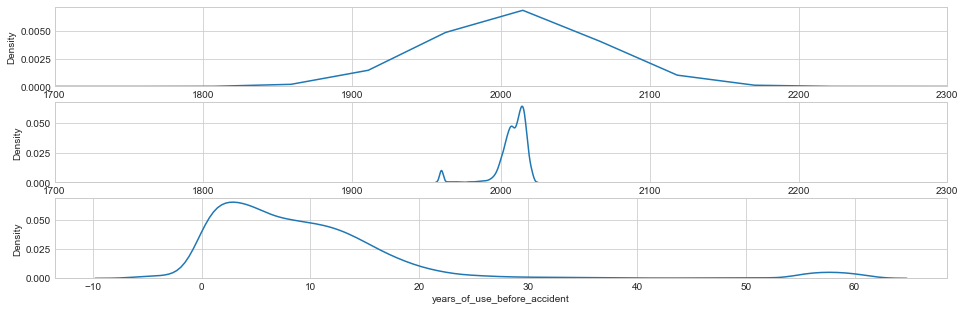

years_of_use_before_accident
 60.0    0.846561
 59.0    0.835766
 61.0    0.834286
 58.0    0.789286
 57.0    0.788104
 55.0    0.747573
 56.0    0.745174
 23.0    0.669903
 53.0    0.666667
 38.0    0.666667
 22.0    0.656566
 35.0    0.656250
 45.0    0.647059
 54.0    0.642857
 20.0    0.639692
 17.0    0.637915
 21.0    0.632546
 15.0    0.628391
 19.0    0.620120
 16.0    0.612380
 24.0    0.611940
 18.0    0.607623
 25.0    0.601449
 27.0    0.600000
 47.0    0.590909
 50.0    0.590909
 26.0    0.586538
 13.0    0.586538
 30.0    0.585366
 12.0    0.584171
 14.0    0.582359
 10.0    0.577016
 39.0    0.571429
 42.0    0.571429
-3.0     0.567568
 11.0    0.567177
 49.0    0.565217
 37.0    0.565217
 36.0    0.560000
 9.0     0.552685
 46.0    0.545455
 51.0    0.545455
 40.0    0.533333
 34.0    0.533333
-1.0     0.529968
Name: Fault, dtype: float64

In [8]:
# Year Outlier Detection
year_higher_threshold = train["Crash_Year"].astype(float).max()
year_lowerr_threshold = 1960

train['clean_Vehicle_Year'] = np.where(train['Vehicle_Year'].astype(float)>year_higher_threshold,year_higher_threshold, train['Vehicle_Year'])
train['clean_Vehicle_Year'] = np.where(train['clean_Vehicle_Year'].astype(float)< year_lowerr_threshold,year_lowerr_threshold, train['clean_Vehicle_Year'])

# print('mean max years' ,train['clean_Vehicle_Year'].min() ,train['clean_Vehicle_Year'].max() )
plt.figure(figsize=(16,5))
plt.subplot(3,1,1)
sns.distplot(train['Vehicle_Year'] , hist =False)
plt.xlim(1700, 2300)
plt.subplot(3,1,2)
sns.distplot(train['clean_Vehicle_Year'] , hist =False)
plt.xlim(1700, 2300)

# finding the gap between bought year & accident year

train['years_of_use_before_accident'] = train['Crash_Year'].astype(float) - train['clean_Vehicle_Year'].astype(float)
plt.subplot(3,1,3)
sns.distplot(train['years_of_use_before_accident'] , hist =False)
plt.show()
#checkng how the chance of accident varies with number of usage
train.groupby("years_of_use_before_accident")["Fault"].mean().sort_values(ascending=False)[:-1]

#### Route_Type

Cheking the impact of Route_Type on the dependent variable
Fetching Mean:-
Route_Type
NA                      0.734300
municipality            0.594014
government              0.576923
county                  0.572514
service road            0.568807
other public roadway    0.568507
ramp                    0.555276
interstate (state)      0.530131
unknown                 0.504762
maryland (state)        0.495685
us (state)              0.478394
Name: Fault, dtype: float64


Fetching Count:-
Route_Type
NA                       4968
county                  16059
government                390
interstate (state)       1145
maryland (state)        22482
municipality             2840
other public roadway      489
ramp                      398
service road              218
unknown                   210
us (state)               2291
Name: Fault, dtype: int64


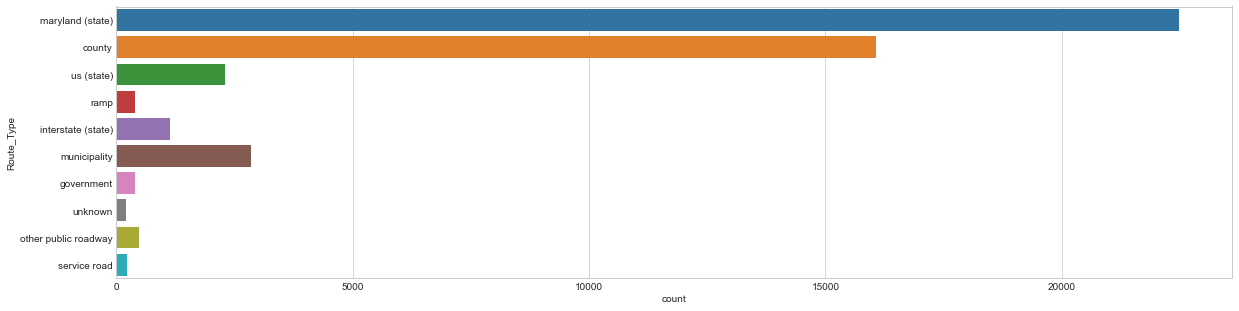

In [9]:
# Route_Type
fig = plt.figure(figsize=(20,5))
sns.countplot(y='Route_Type', data=train)

print("Cheking the impact of Route_Type on the dependent variable")
print("Fetching Mean:-")
print(train.fillna("NA").groupby("Route_Type")["Fault"].mean().sort_values(ascending=False))
print("\n\nFetching Count:-")
print(train.fillna("NA").groupby("Route_Type")["Fault"].count())


train["cleaned_Route_Type"] = np.where(train.Route_Type.isnull(),"county",train.Route_Type)

#### Road_Name

In [10]:
Road_Fault_Rating_dict = train.groupby("Road_Name")["Fault"].mean().sort_values(ascending=False).to_dict()
print(dict(list(Road_Fault_Rating_dict.items())[0: 5]) )
Road_Fault_Rating_NA = train[train.Road_Name.isna()]["Fault"].mean()
print('average fault rating for NA road name in Train',Road_Fault_Rating_NA)
train['Road_Fault_Rating'] = train['Road_Name'].map(Road_Fault_Rating_dict)
test['Road_Fault_Rating'] = test['Road_Name'].map(Road_Fault_Rating_dict)
test['Road_Fault_Rating'] = test['Road_Fault_Rating'].replace(np.nan, Road_Fault_Rating_NA)# for any new road name not in Train
# train[['Road_Fault_Rating','Road_Name']]

{'zion rd': 1.0, 'horseshoe la': 1.0, 'golden meadow dr': 1.0, 'goldsboro ct': 1.0, 'st johnsbury la': 1.0}
average fault rating for NA road name in Train 0.7514438027543314


#### Collision_Type

In [11]:
train["clean_Collision_Type"] =  train[["Collision_Type"]].fillna("same dir rear end")

#### Weather

In [12]:
# Combiningg the weather column together
replaceDict = { "blowing sand, soil, dirt" : "severe winds",
                "blowing snow" : "snow",
                "sleet" : "raining",
                "foggy" : "wintry mix"
}

train["clean_Weather"] = train.Weather.map(replaceDict).fillna("clear")


## Column to be selected

In [13]:
colList = ["cleaned_Agency_Name","Crash_Weekend_Flag","Crash_hour","years_of_use_before_accident","cleaned_Route_Type","Road_Fault_Rating","clean_Collision_Type","clean_Weather","Surface_Condition","Light","Traffic_Control","Driver_Substance_Abuse","Vehicle_Movement","Speed_Limit","Vehicle_First_Impact_Location","Fault"]
train[colList].dtypes

cleaned_Agency_Name               object
Crash_Weekend_Flag                 int64
Crash_hour                        object
years_of_use_before_accident     float64
cleaned_Route_Type                object
Road_Fault_Rating                float64
clean_Collision_Type              object
clean_Weather                     object
Surface_Condition                 object
Light                             object
Traffic_Control                   object
Driver_Substance_Abuse            object
Vehicle_Movement                  object
Speed_Limit                       object
Vehicle_First_Impact_Location     object
Fault                              int64
dtype: object

In [14]:
# numeric

numeric_col_list = ["Crash_Weekend_Flag","years_of_use_before_accident","Road_Fault_Rating","Speed_Limit","Crash_hour","Fault"]
cat_col_list = list(set(colList) - set(numeric_col_list))
print(cat_col_list)
print(len(cat_col_list))
print(len(numeric_col_list))
print(len(train.columns))

['cleaned_Agency_Name', 'Vehicle_Movement', 'Light', 'Traffic_Control', 'clean_Weather', 'Surface_Condition', 'Driver_Substance_Abuse', 'clean_Collision_Type', 'cleaned_Route_Type', 'Vehicle_First_Impact_Location']
10
6
58


## Encoding

In [15]:
encoded_train = pd.get_dummies(train[colList], columns= cat_col_list, prefix=cat_col_list)

### Split the training dataset

In [16]:
# Spliting the train and test dataset to X_train/y_train and X_test/y_test
X_train = encoded_train.drop('Fault', 1)
y_train = encoded_train["Fault"]

test_id = test["Id"]
X_test = test.drop("Id",1)

print("Done")

Done


### CatBoostClassifier

In [17]:
cat_features = np.where(X_train.dtypes != np.float)[0]
cat_features

array([  0,   1,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
        15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
        28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
        41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
        54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,
        67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
       106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
       119, 120, 121, 122])

In [18]:
train_pool = Pool(X_train, y_train,cat_features)

In [19]:
catboost_model = CatBoostClassifier(iterations=1000,custom_loss=['Accuracy'],loss_function='Logloss')

In [28]:
# # params = {'max_depth': [3,4,5],'n_estimators':[100, 200, 300]}


# params = {'depth':[3,1,2,6,4,5,7,8,9,10],
#           'iterations':[250,100,500,1000],
#           'learning_rate':[0.03,0.001,0.01,0.1,0.2,0.3], 
#           'l2_leaf_reg':[3,1,5,10,100],
#         #   'border_count':[32,5,10,20,50,100,200],
#         #   'ctr_border_count':[50,5,10,20,100,200],
#           'thread_count':[4]}


# grid_search_result = catboost_model.grid_search(params, 
#                                        X=X_train, 
#                                        y=y_train, 
#                                        plot=False)

print("Above code takes time to run, the output of this code has been used in the next cell")

Above code takes time to run, the output of this code has been used in the next cell


In [21]:
catboost_model = CatBoostClassifier(iterations=250,custom_loss=['Accuracy'],loss_function='Logloss',thread_count = 4,depth = 9,l2_leaf_reg = 10,learning_rate = 0.1)

# Fit CatBoost model
catboost_model.fit(train_pool,plot=True)

# CatBoost accuracy
acc_catboost = round(catboost_model.score(X_train, y_train) * 100, 2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6235211	total: 162ms	remaining: 40.3s
1:	learn: 0.5727145	total: 249ms	remaining: 30.8s
2:	learn: 0.5330300	total: 375ms	remaining: 30.9s
3:	learn: 0.5034241	total: 477ms	remaining: 29.3s
4:	learn: 0.4798117	total: 566ms	remaining: 27.7s
5:	learn: 0.4592331	total: 651ms	remaining: 26.5s
6:	learn: 0.4444108	total: 737ms	remaining: 25.6s
7:	learn: 0.4330815	total: 814ms	remaining: 24.6s
8:	learn: 0.4216094	total: 914ms	remaining: 24.5s
9:	learn: 0.4146639	total: 1s	remaining: 24.1s
10:	learn: 0.4077017	total: 1.08s	remaining: 23.6s
11:	learn: 0.4013323	total: 1.17s	remaining: 23.1s
12:	learn: 0.3977045	total: 1.27s	remaining: 23.1s
13:	learn: 0.3920542	total: 1.36s	remaining: 22.9s
14:	learn: 0.3880177	total: 1.44s	remaining: 22.6s
15:	learn: 0.3838375	total: 1.55s	remaining: 22.7s
16:	learn: 0.3812351	total: 1.64s	remaining: 22.5s
17:	learn: 0.3782139	total: 1.76s	remaining: 22.8s
18:	learn: 0.3756508	total: 1.86s	remaining: 22.6s
19:	learn: 0.3737087	total: 1.96s	remaining:

In [22]:
cv_params = catboost_model.get_params()


cv_data = cv(train_pool,cv_params,fold_count=10,plot=True)


acc_cv_catboost = round(np.max(cv_data['test-Accuracy-mean']) * 100, 2)

output_df = pd.DataFrame({"Model_Name":["CatBoostClassifier"],"Accuracy":[acc_catboost],"Accuracy_CV":[acc_cv_catboost]})

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/10]
0:	learn: 0.6214791	test: 0.6215733	best: 0.6215733 (0)	total: 209ms	remaining: 52.1s
1:	learn: 0.5700194	test: 0.5707772	best: 0.5707772 (1)	total: 676ms	remaining: 1m 23s
2:	learn: 0.5320869	test: 0.5326787	best: 0.5326787 (2)	total: 1.49s	remaining: 2m 2s
3:	learn: 0.5009344	test: 0.5018451	best: 0.5018451 (3)	total: 1.99s	remaining: 2m 2s
4:	learn: 0.4773861	test: 0.4783003	best: 0.4783003 (4)	total: 2.48s	remaining: 2m 1s
5:	learn: 0.4583988	test: 0.4596886	best: 0.4596886 (5)	total: 2.73s	remaining: 1m 50s
6:	learn: 0.4428602	test: 0.4449793	best: 0.4449793 (6)	total: 3.08s	remaining: 1m 47s
7:	learn: 0.4311562	test: 0.4335269	best: 0.4335269 (7)	total: 3.32s	remaining: 1m 40s
8:	learn: 0.4207779	test: 0.4233825	best: 0.4233825 (8)	total: 3.68s	remaining: 1m 38s
9:	learn: 0.4129070	test: 0.4162452	best: 0.4162452 (9)	total: 4s	remaining: 1m 35s
10:	learn: 0.4057576	test: 0.4098314	best: 0.4098314 (10)	total: 4.26s	remaining: 1m 32s
11:	learn: 0.4001272	tes

### Working on Test Dataset

crash_year_min_max 2015 2021
['cleaned_Agency_Name', 'Vehicle_Movement', 'Light', 'Traffic_Control', 'clean_Weather', 'Surface_Condition', 'Driver_Substance_Abuse', 'clean_Collision_Type', 'cleaned_Route_Type', 'Vehicle_First_Impact_Location']
10
6
58


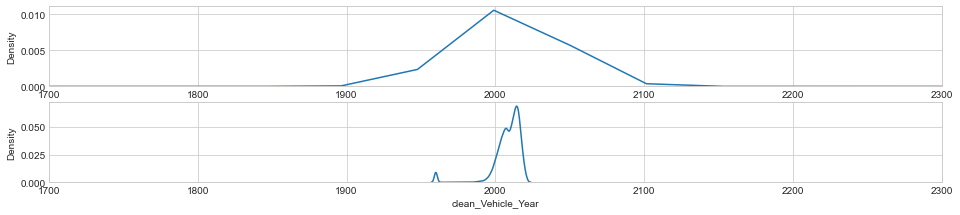

In [23]:
test = master_test
test_id = test["Id"]
X_test = test

X_test["cleaned_Agency_Name"] = [x.lower().split(" ")[0] for x in X_test.Agency_Name]


X_test["Crash_Date_Time"] = pd.to_datetime(X_test["Crash_Date_Time"])
X_test["Crash_Weekday"] = X_test["Crash_Date_Time"].dt.day_name()
X_test["Crash_Weekday_num"] = X_test["Crash_Date_Time"].dt.strftime("%w")
X_test["Crash_Year"] = X_test["Crash_Date_Time"].dt.strftime("%Y")
X_test["Crash_month"] = X_test["Crash_Date_Time"].dt.strftime("%m")
X_test["Crash_week"] = X_test["Crash_Date_Time"].dt.week
X_test["Crash_day_of_month"] =X_test["Crash_Date_Time"].dt.strftime("%d")
X_test["Crash_hour"] = X_test["Crash_Date_Time"].dt.strftime("%H")
X_test["Crash_week_num"] = X_test["Crash_Date_Time"] .dt.strftime("%V")
X_test["Crash_Weekend_Flag"] = np.where(X_test.Crash_Weekday_num.isin(["0","6","5"]), 1,0)

print("crash_year_min_max",X_test["Crash_Year"].min(), X_test["Crash_Year"].max())
crash_columns = [x for x in X_test.columns if x.startswith("Crash_")]

X_test["cleaned_Route_Type"] = np.where(X_test.Route_Type.isnull(),"county",X_test.Route_Type)

######################################################## Year Outlier Detection

year_higher_threshold = X_test["Crash_Year"].astype(float).max()
year_lowerr_threshold = 1960
X_test['clean_Vehicle_Year'] = np.where(X_test['Vehicle_Year'].astype(float)>year_higher_threshold,year_higher_threshold, X_test['Vehicle_Year'])
X_test['clean_Vehicle_Year'] = np.where(X_test['clean_Vehicle_Year'].astype(float)< year_lowerr_threshold,year_lowerr_threshold, X_test['clean_Vehicle_Year'])

# print('mean max years' ,X_test['clean_Vehicle_Year'].min() ,X_test['clean_Vehicle_Year'].max() )
plt.figure(figsize=(16,5))
plt.subplot(3,1,1)
sns.distplot(X_test['Vehicle_Year'] , hist =False)
plt.xlim(1700, 2300)
plt.subplot(3,1,2)
sns.distplot(X_test['clean_Vehicle_Year'] , hist =False)
plt.xlim(1700, 2300)

X_test['years_of_use_before_accident'] = X_test['Crash_Year'].astype(float) - X_test['clean_Vehicle_Year'].astype(float)


X_test["clean_Collision_Type"] =  X_test[["Collision_Type"]].fillna("same dir rear end")


replaceDict = { "blowing sand, soil, dirt" : "severe winds",
                "blowing snow" : "snow",
                "sleet" : "raining",
                "foggy" : "wintry mix"
}

X_test["clean_Weather"] = X_test.Weather.map(replaceDict).fillna("clear")



colList = ["cleaned_Agency_Name","Id","Crash_Weekend_Flag","Crash_hour","years_of_use_before_accident","cleaned_Route_Type","Road_Fault_Rating","clean_Collision_Type","clean_Weather","Surface_Condition","Light","Traffic_Control","Driver_Substance_Abuse","Vehicle_Movement","Speed_Limit","Vehicle_First_Impact_Location"]
X_test[colList].dtypes


# numeric

numeric_col_list = ["Crash_Weekend_Flag","years_of_use_before_accident","Road_Fault_Rating","Speed_Limit","Crash_hour","Id"]
cat_col_list = list(set(colList) - set(numeric_col_list))
print(cat_col_list)
print(len(cat_col_list))
print(len(numeric_col_list))
print(len(X_test.columns))

encoded_test = pd.get_dummies(X_test[colList], columns= cat_col_list, prefix=cat_col_list)

In [24]:
id_df = encoded_test["Id"]
X_test_final = encoded_test.drop("Id",1)

### Predicting on test dataset

In [25]:
preds_class = catboost_model.predict(X_test_final)

In [26]:
final_df = pd.DataFrame(list(zip(id_df,preds_class)),columns=["Id","Fault"])
print(final_df.nunique())
display(final_df)

Id       77235
Fault        2
dtype: int64


,Id,Fault
0,0,1
1,1,0
2,2,0
3,3,1
4,4,1
...,...,...
77230,77230,0
77231,77231,1
77232,77232,0
77233,77233,1


#### Saving CSV

In [27]:
final_df.to_csv("CS21MDS14003_CS21MDS14025_SUBMISSION.csv",index = False)